In [7]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Replace 'your_username', 'your_password', 'your_host', and 'your_database' with
connection = mysql.connector.connect(
user='root',
password='root',
host='localhost',
database='Ecommerce_Data_Analysis'
)
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'customer' table
cursor.execute('SELECT * FROM customer')
#After fetching data from the database we are storing it into Pandas DataFrame
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Query data from the 'product' table
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Query data from the 'order_details' table
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
#printing first 5 records from each table
print(customer_data.head())
#print(product_data.head())
print(order_data.head())


  customer_id           name         city                      email  \
0        C001  Alice Johnson     New York  alice.johnson@example.com   
1        C002      Bob Smith  Los Angeles      bob.smith@example.com   
2        C003    Carol Brown      Chicago    carol.brown@example.com   
3        C004    David White      Houston    david.white@example.com   
4        C005     Emma Green      Phoenix     emma.green@example.com   

   phone_no              address  pin_code  
0  555-0100     123 Maple Street     10001  
1  555-0101       456 Oak Avenue     90001  
2  555-0102        789 Pine Road     60601  
3  555-0103       101 Cedar Lane     77001  
4  555-0104  202 Birch Boulevard     85001  
   order_id customer_id product_id  quantity  total_price payment_mode  \
0         1        C001       P001       1.0        19.99  Credit Card   
1         2        C002       P002       2.0       159.98       PayPal   
2         3        C003       P003       1.0       699.99  Credit Card   
3

data cleaning

In [3]:
# Check for missing values in each table
print("Missing values in customer_data:")
print(customer_data.isnull().sum())
print("\nMissing values in product_data:")
print(product_data.isnull().sum())
print("\nMissing values in order_data:")
print(order_data.isnull().sum())

# Ensure data types are appropriate
print("\nData types in customer_data:")
print(customer_data.dtypes)
print("\nData types in product_data:")
print(product_data.dtypes)
print("\nData types in order_data:")
print(order_data.dtypes)



Missing values in customer_data:
customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64

Missing values in product_data:
product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64

Missing values in order_data:
order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64

Data types in customer_data:
customer_id    object
name           object
city           object
email          object
phone_no       object
address        object
pin_code        int64
dtype: object

Data types in product_data:
product_id         object
product_name       object
category           object
sub_category       object
original_price    float64
selling_price     float64
stock               int64
dtype: object

Data types in order_data:
order_id   

## Exploratory Data Analysis (EDA) and Visualization:

### Customer Analysis:

#### Identify the total number of customers City wise

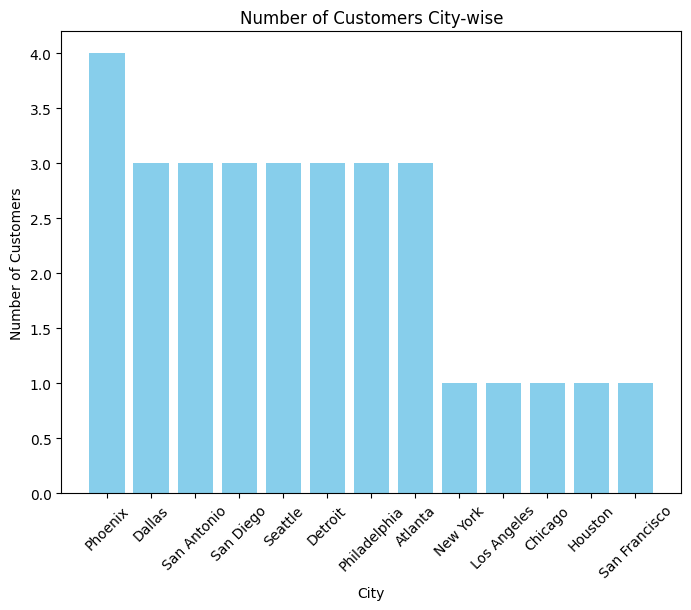

In [4]:

customer_counts = customer_data['city'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(customer_counts.index, customer_counts.values, color='skyblue')

plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.title('Number of Customers City-wise')
plt.xticks(rotation=45)
plt.show()

Identify the most frequent customers based on their order history

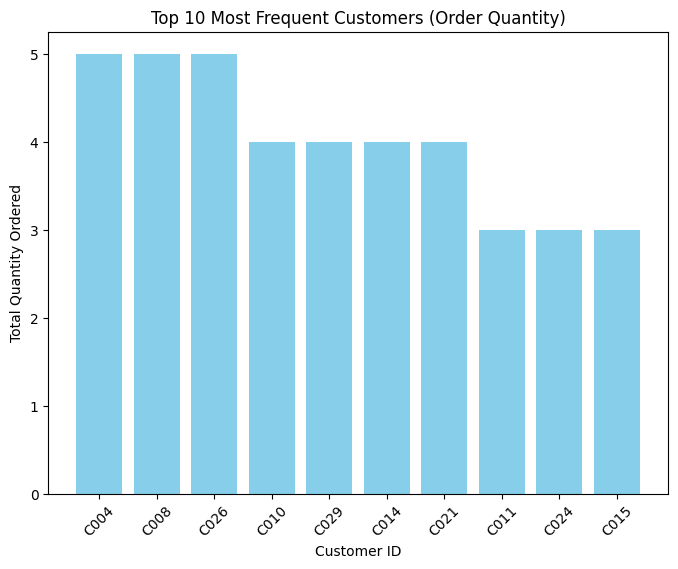

In [5]:
# Sort by quantity (descending) and select top 10 customers
top_10_customers = order_data.sort_values(by='quantity', ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(top_10_customers['customer_id'], top_10_customers['quantity'], color='skyblue')

# Set chart title and labels
plt.title('Top 10 Most Frequent Customers (Order Quantity)')
plt.xlabel('Customer ID')
plt.ylabel('Total Quantity Ordered')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.show()

●
## Product Analysis:

### Determine the total number of products available by category.

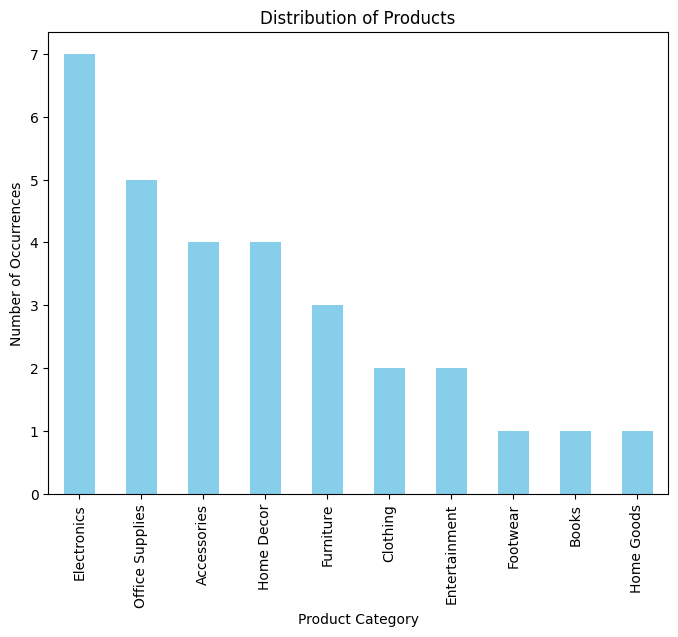

In [6]:
# Count occurrences of each product category
category_counts = product_data['category'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')

# Set chart title and labels
plt.title('Distribution of Products')
plt.xlabel('Product Category')
plt.ylabel('Number of Occurrences')

# Show the chart
plt.show()

Analyze the distribution of products across sub-categories.

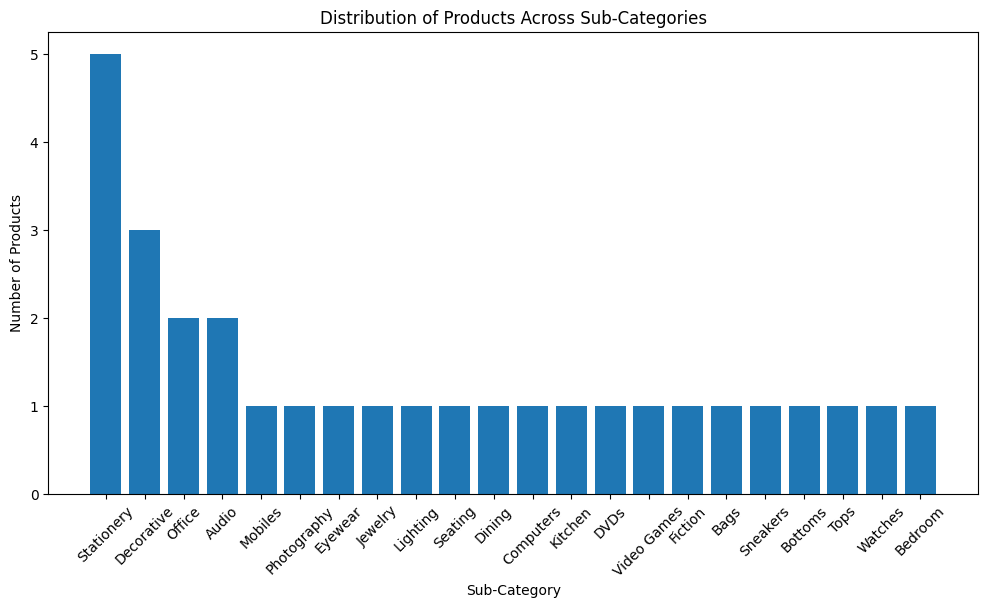

In [7]:
import matplotlib.pyplot as plt

num_products=product_data['sub_category'].value_counts()
# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar( num_products.index, num_products.values)

# Set chart title and labels
plt.title('Distribution of Products Across Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.show()

Identify products with low stock levels.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Electronics'),
  Text(1, 0, 'Accessories'),
  Text(2, 0, 'Clothing'),
  Text(3, 0, 'Footwear'),
  Text(4, 0, 'Books'),
  Text(5, 0, 'Entertainment'),
  Text(6, 0, 'Home Goods'),
  Text(7, 0, 'Furniture'),
  Text(8, 0, 'Home Decor'),
  Text(9, 0, 'Office Supplies')])

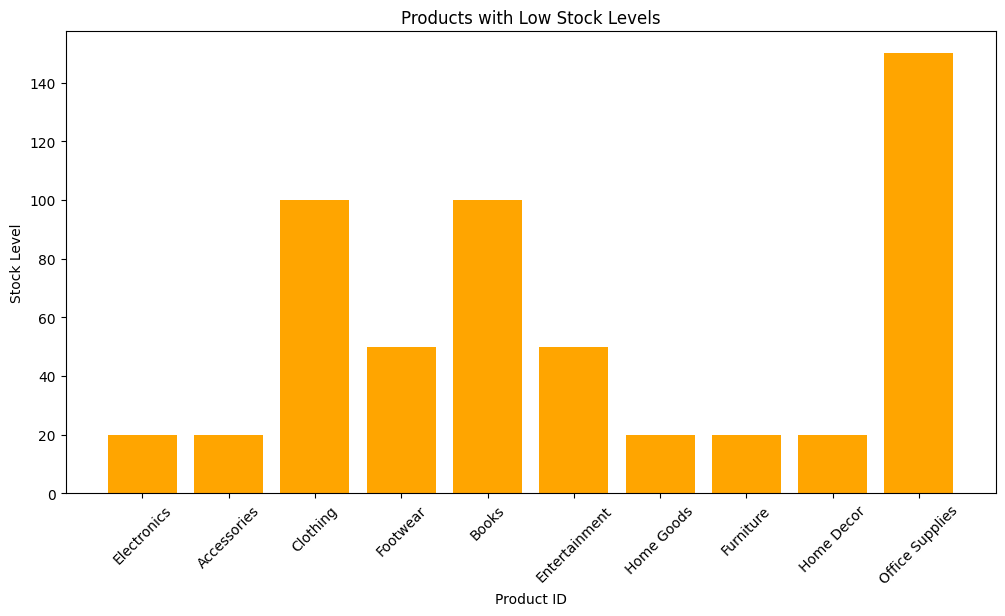

In [8]:
import matplotlib.pyplot as plt
# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar( product_data['category'],product_data['stock'] , color='orange')

# Set chart title and labels
plt.title('Products with Low Stock Levels')
plt.xlabel('Product ID')
plt.ylabel('Stock Level')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)


Calculate the average, maximum, and minimum selling prices for
products

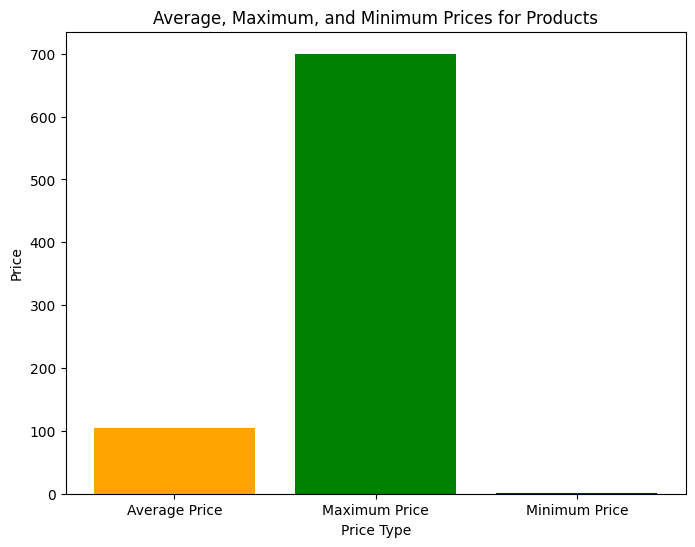

In [9]:

# Calculate average, maximum, and minimum selling prices
average_price = product_data['selling_price'].mean()
maximum_price = product_data['selling_price'].max()
minimum_price = product_data['selling_price'].min()

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Average Price', 'Maximum Price', 'Minimum Price'], [average_price, maximum_price, minimum_price], color=['orange', 'green', 'blue'])

# Set chart title and labels
plt.title('Average, Maximum, and Minimum Prices for Products')
plt.xlabel('Price Type')
plt.ylabel('Price')

# Show the chart
plt.show()


## Order Analysis:

### Calculate the top 10 orders product wise

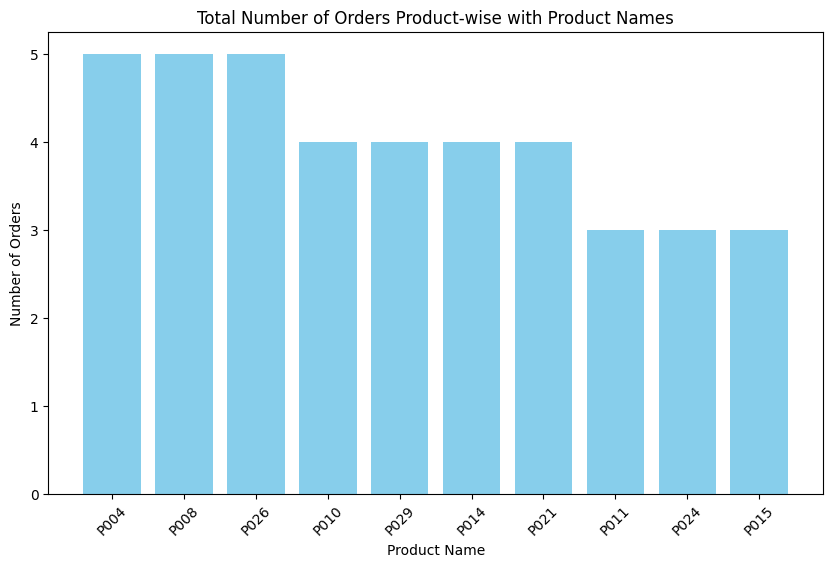

In [10]:

plt.figure(figsize=(10, 6))
top_10_customers = order_data.sort_values(by='quantity', ascending=False).head(10)
plt.bar (top_10_customers['product_id'], top_10_customers['quantity'], color='skyblue')

# Set chart title and labels
plt.title('Total Number of Orders Product-wise with Product Names')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.show()

○
Analyze the order status distribution (e.g., pending, delivered)

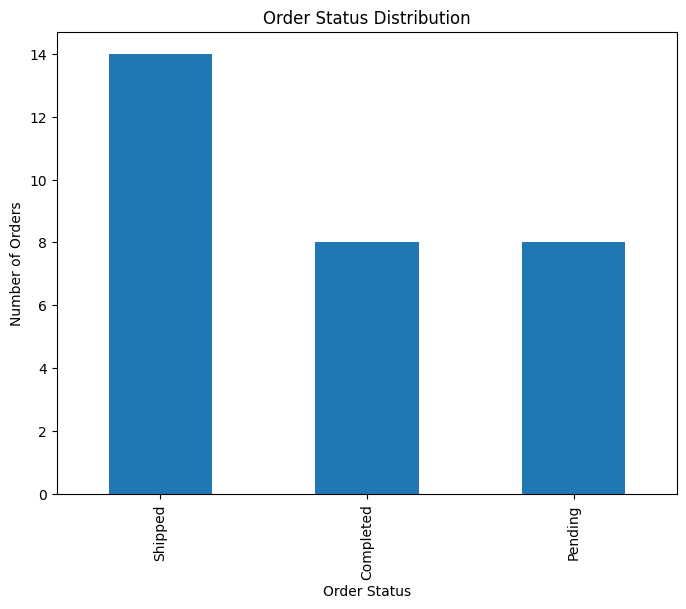

In [11]:
# Count occurrences of each order status
order_status_counts = order_data['order_status'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))
order_status_counts.plot(kind='bar')

# Set chart title and labels
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')

# Show the chart
plt.show()

○
Identify the most popular products based on order quantity.

C:\Users\Venu Raj\AppData\Local\Temp\ipykernel_29828\4166198584.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  product_quantity = pd.read_sql_query("SELECT product_id, product_name FROM product", connection)


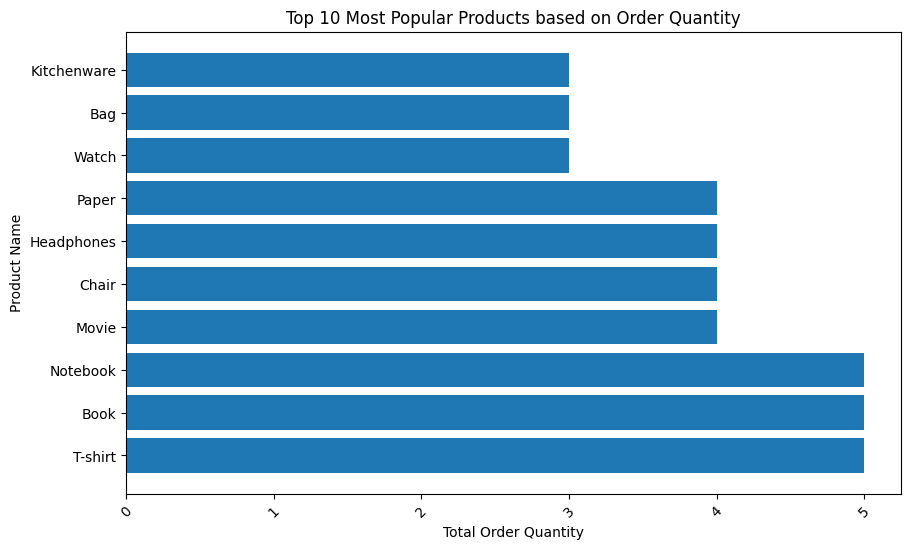

In [12]:

cursor.execute("SELECT product_id, SUM(quantity) AS total_quantity FROM order_details GROUP BY product_id ORDER BY total_quantity DESC LIMIT 10")
product_popularity = pd.DataFrame(cursor.fetchall(), columns=['product_id', 'total_quantity'])

# Join with product table to get product names
product_quantity = pd.read_sql_query("SELECT product_id, product_name FROM product", connection)
merged_data = product_popularity.merge(product_quantity, on='product_id')

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(merged_data['product_name'], merged_data['total_quantity'])

# Set chart title and labels
plt.title('Top 10 Most Popular Products based on Order Quantity')
plt.ylabel('Product Name')
plt.xlabel('Total Order Quantity')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.show()


## Sales Analysis:
○
Calculate total revenue generated from orders product wise.

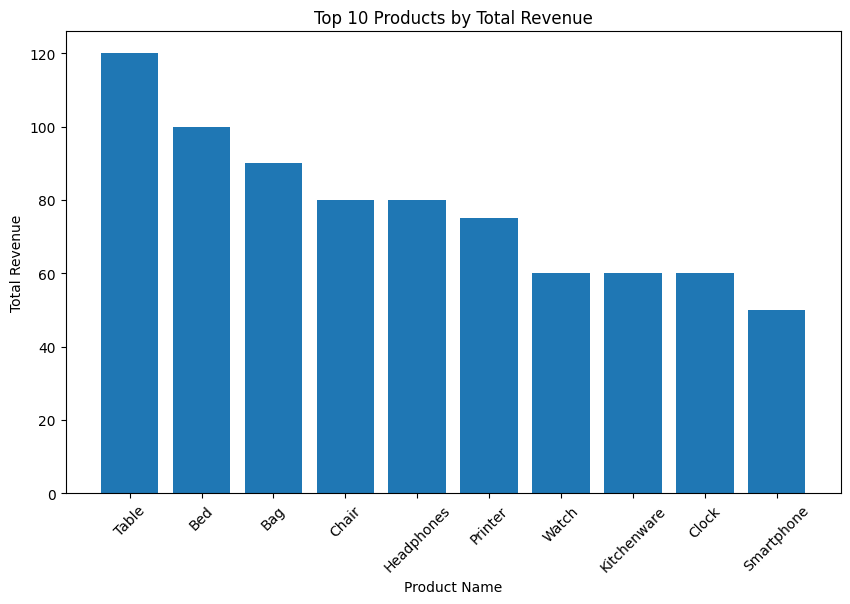

In [13]:

cursor.execute("SELECT product_id, SUM(total_price) AS total_revenue FROM order_details GROUP BY product_id ORDER BY total_revenue DESC LIMIT 10")
revenue_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

merged_data = pd.merge(revenue_data, product_data, on='product_id')

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(merged_data['product_name'], merged_data['total_revenue'])

# Set chart title and labels
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.show()


○
Calculate total revenue product category wise percentage.

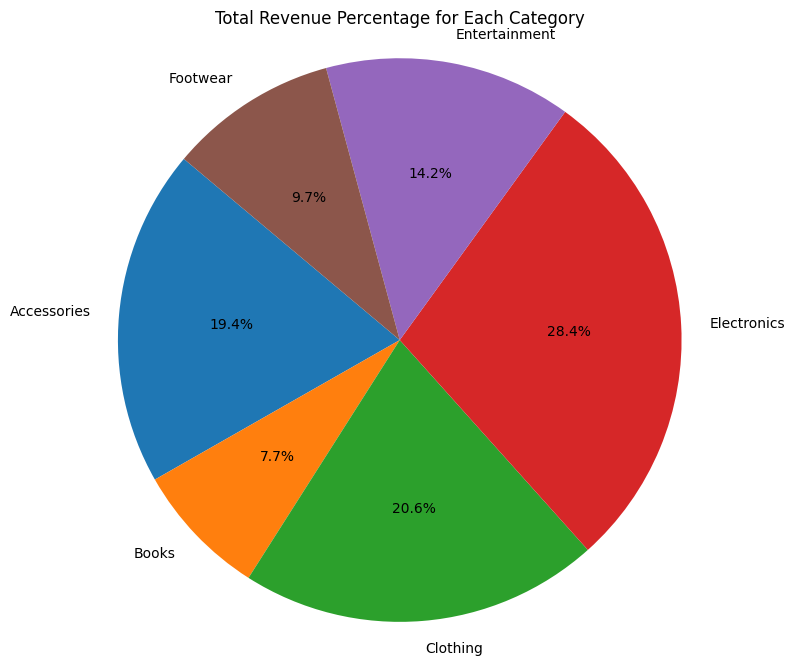

In [14]:

cursor.execute("SELECT product_id, SUM(total_price) AS total_revenue FROM order_details GROUP BY product_id ORDER BY total_revenue DESC LIMIT 10")
revenue_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

merged_data = pd.merge(revenue_data, product_data, on='product_id')

category_revenue = merged_data.groupby(product_data['category'])['total_revenue'].sum()

plt.figure(figsize=(8, 8))
plt.pie(category_revenue, labels=category_revenue.index, autopct='%1.1f%%', startangle=140)  # Add labels and percentages

# Set chart title
plt.title('Total Revenue Percentage for Each Category')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the chart
plt.show()

Calculate the total revenue generated from all orders

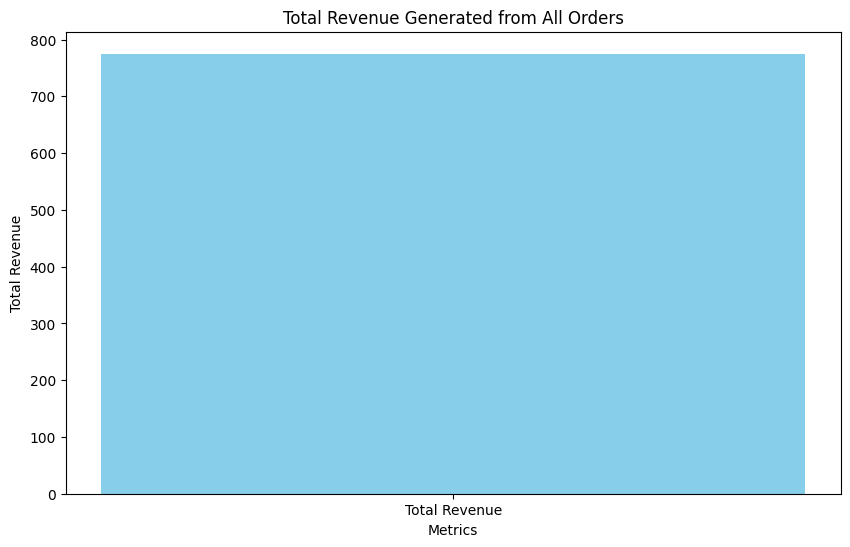

In [15]:
cursor.execute("SELECT product_id, SUM(total_price) AS total_revenue FROM order_details GROUP BY product_id ORDER BY total_revenue DESC LIMIT 10")
revenue_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

merged_data = pd.merge(revenue_data, product_data, on='product_id')

# Calculate total revenue
total_revenue = merged_data['total_revenue'].sum()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(['Total Revenue'], [total_revenue], color='skyblue')

# Set chart title and labels
plt.title('Total Revenue Generated from All Orders')
plt.xlabel('Metrics')
plt.ylabel('Total Revenue')

# Show the chart
plt.show()

○
Identify the most profitable products based on the difference between
original and selling prices.

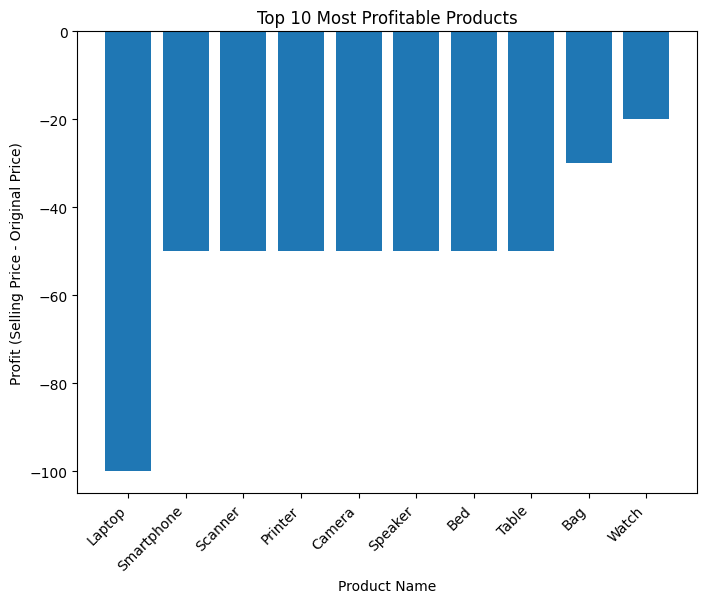

In [16]:
product_data['profit'] = product_data['selling_price'] - product_data['original_price']

# Sort the DataFrame by profit
top_10_profitable_products = product_data.sort_values(by='profit', ascending=True).head(10)

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.bar(top_10_profitable_products['product_name'], top_10_profitable_products['profit'])
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Product Name')
plt.ylabel('Profit (Selling Price - Original Price)')
plt.xticks(rotation=45, ha='right')
plt.show()

## Customer Order Patterns:
○
Identify product names with the highest and lowest order quantities

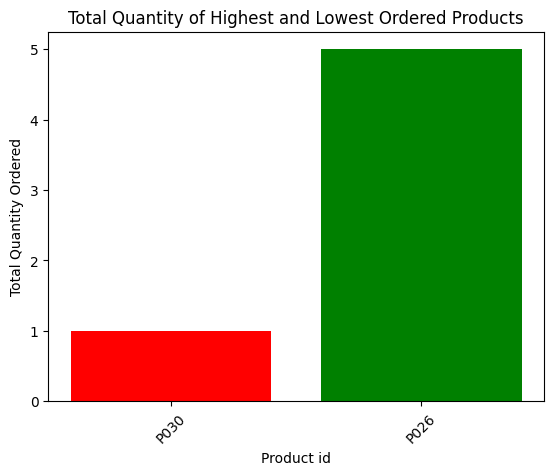

In [17]:
# Group by product_id and sum the quantities
product_quantity = order_data.groupby('product_id')['quantity'].sum()

# Sort the quantities to find the highest and lowest ordered products
sorted_product_quantity = product_quantity.sort_values()

lowest_ordered = sorted_product_quantity.index[0]
highest_ordered = sorted_product_quantity.index[-1]

# Plotting the bar chart
plt.bar([lowest_ordered, highest_ordered],
        [sorted_product_quantity[lowest_ordered], sorted_product_quantity[highest_ordered]],
        color=['red', 'green'])
plt.title('Total Quantity of Highest and Lowest Ordered Products')
plt.xlabel('Product id')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.show()



○
Identify customers with the highest and lowest order quantities by
customer name.

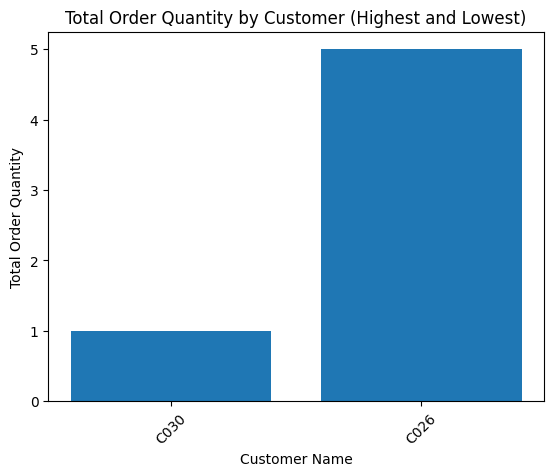

In [18]:
# Group by product_id and sum the quantities
customer_quantity = order_data.groupby('customer_id')['quantity'].sum()

# Sort the quantities to find the highest and lowest ordered products
sorted_product_quantity = customer_quantity.sort_values()

lowest_ordered = sorted_product_quantity.index[0]
highest_ordered = sorted_product_quantity.index[-1]

# Plotting the bar chart
plt.bar([lowest_ordered, highest_ordered],
        [sorted_product_quantity[lowest_ordered], sorted_product_quantity[highest_ordered]])
plt.xlabel("Customer Name")
plt.ylabel("Total Order Quantity")
plt.title("Total Order Quantity by Customer (Highest and Lowest)")
plt.xticks(rotation=45)
plt.show()


○
Determine the most preferred payment modes

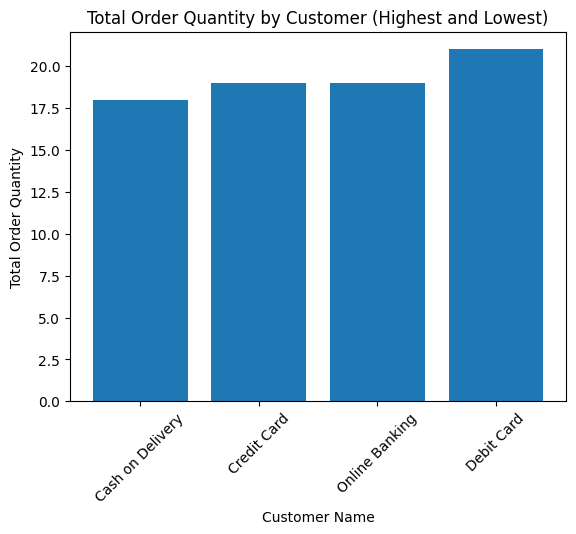

In [19]:
# Group by product_id and sum the quantities
payment_quantity = order_data.groupby('payment_mode')['quantity'].sum().sort_values()

# Plotting the bar chart
plt.bar(payment_quantity.index,payment_quantity)
plt.xlabel("Customer Name")
plt.ylabel("Total Order Quantity")
plt.title("Total Order Quantity by Customer (Highest and Lowest)")
plt.xticks(rotation=45)
plt.show()


## Time-based Analysis:
○
Month wise total sales.

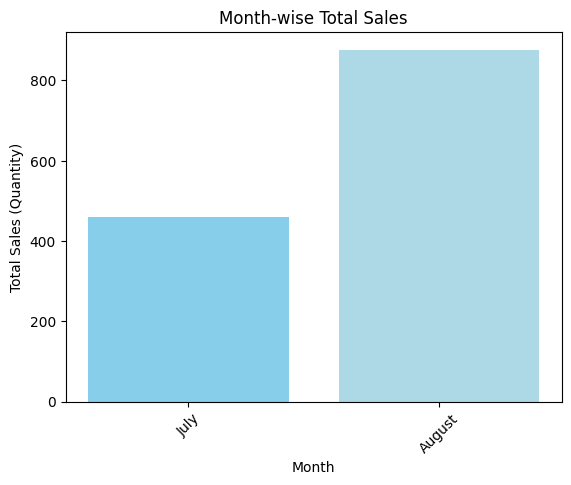

In [20]:
order_data['month'] = order_data['order_date'].dt.strftime('%B')
# Assuming 'month' column exists in 'order_data' DataFrame
month_wise_sales = order_data.groupby('month')['total_price'].sum().sort_values()

# Plotting the bar chart
plt.bar(month_wise_sales.index, month_wise_sales,color=['skyblue','lightblue'])
plt.xlabel("Month")
plt.ylabel("Total Sales (Quantity)")
plt.title("Month-wise Total Sales")
plt.xticks(rotation=45)
plt.show()

○
Month and year wise total sales

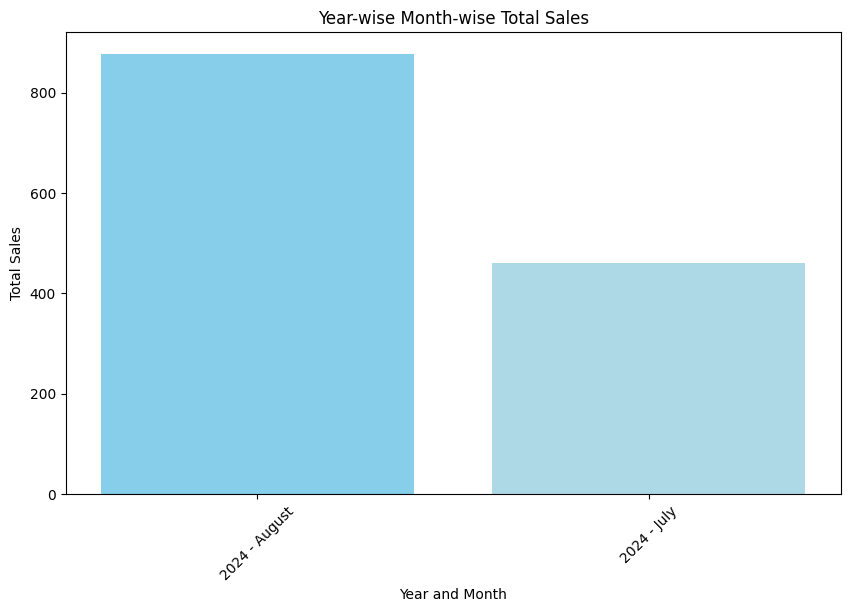

In [21]:
order_data['year'] = order_data['order_date'].dt.year
order_data['month'] =order_data['order_date'].dt.strftime('%B')
# Group by year and month, then sum the total price
year_month_sales = order_data.groupby(['year', 'month'])['total_price'].sum().reset_index()
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(year_month_sales['year'].astype(str) + ' - ' + year_month_sales['month'], year_month_sales['total_price'],color=['skyblue','lightblue'])
plt.xlabel('Year and Month')
plt.ylabel('Total Sales')
plt.title('Year-wise Month-wise Total Sales')
plt.xticks(rotation=45)
plt.show()

○
Identify peak order date.

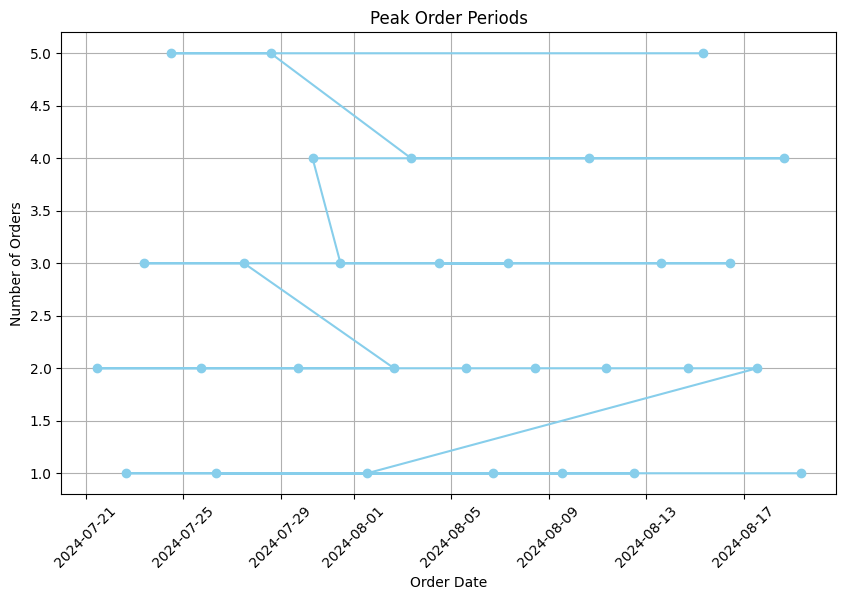

In [22]:
date_wise_sales = order_data.groupby('order_date')['quantity'].sum().sort_values()
# Create line chart
plt.figure(figsize=(10, 6))
plt.plot(date_wise_sales.index,date_wise_sales.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.title('Peak Order Periods')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

●
## Geographical Analysis:
○
Explore the distribution of customers across different cities.

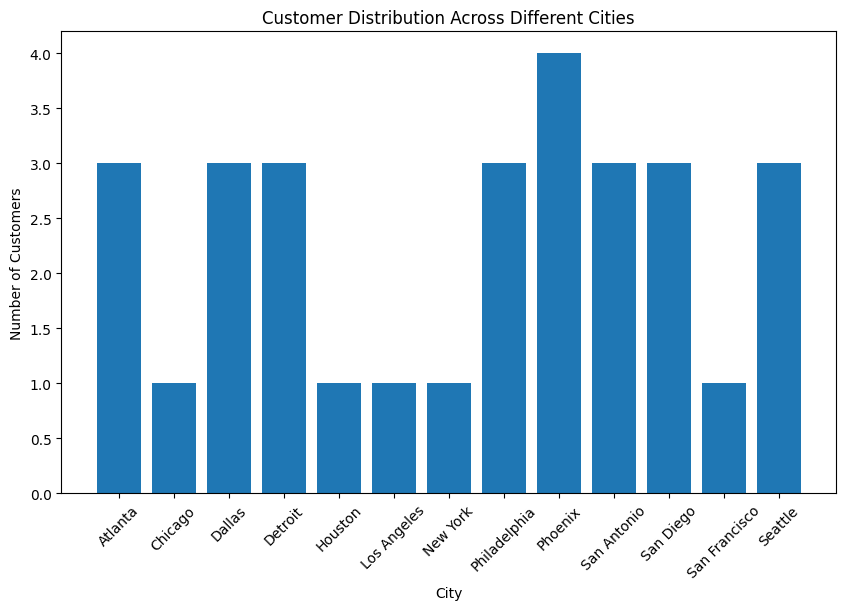

In [23]:
city_wise = customer_data.groupby('city')['customer_id'].count()
plt.figure(figsize=(10, 6))
plt.bar(city_wise.index, city_wise.values)  
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution Across Different Cities")
plt.xticks(rotation=45)
plt.show()

○
Analyze whether certain products or categories are more popular in a
specific city.

In [24]:

# pivot_df = customer_data.pivot_table(index='city', columns='category', values='customer_id')

# # Create the heatmap
# plt.figure(figsize=(10, 6))
# plt.imshow(pivot_df, cmap='viridis', interpolation='nearest')
# plt.colorbar()

# # Set labels and title
# plt.xlabel('Category')
# plt.ylabel('City')
# plt.title('Category Popularity in Each Region and City')

# # Set ticks and labels for rows and columns
# plt.xticks(range(len(pivot_df.columns)), pivot_df.columns)
# plt.yticks(range(len(pivot_df.index)), pivot_df.index)

# # Add annotations (optional)
# for i in range(len(pivot_df.index)):
#     for j in range(len(pivot_df.columns)):
#         plt.text(j, i, pivot_df.values[i, j], ha="center", va="center", color="white")

# plt.show()

## Product Performance:
○
Identify the best-selling products.

C:\Users\Venu Raj\AppData\Local\Temp\ipykernel_29828\1849397243.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  product_quantity = pd.read_sql_query("SELECT product_id, product_name FROM product", connection)


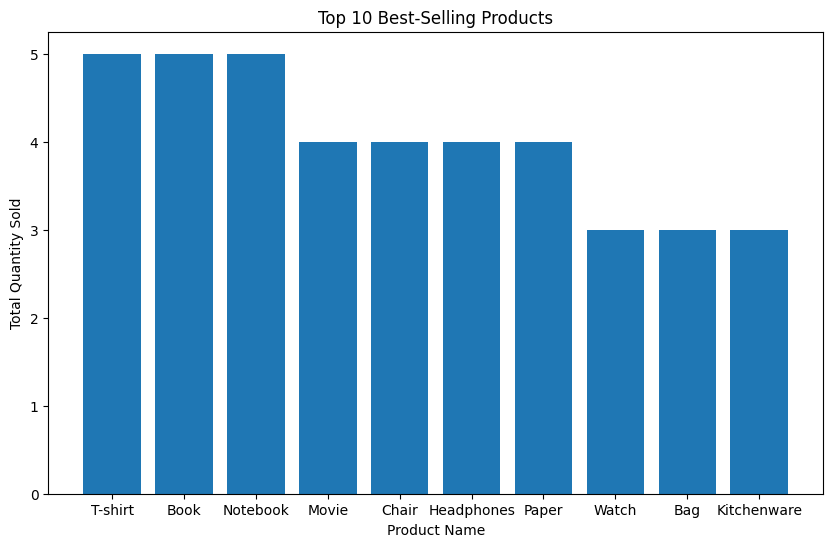

In [25]:

cursor.execute("SELECT product_id, SUM(quantity) AS total_quantity FROM order_details GROUP BY product_id ORDER BY total_quantity DESC LIMIT 10")
product_selling = pd.DataFrame(cursor.fetchall(), columns=['product_id', 'total_quantity'])

product_quantity = pd.read_sql_query("SELECT product_id, product_name FROM product", connection)
merged_data = product_selling.merge(product_quantity, on='product_id')

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(merged_data['product_name'], merged_data['total_quantity'])
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product Name')
plt.title('Top 10 Best-Selling Products')

plt.show()

○
Identify top 10 slow-moving products based on low sales.

C:\Users\Venu Raj\AppData\Local\Temp\ipykernel_29828\13013929.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  product_quantity = pd.read_sql_query("SELECT product_id, product_name FROM product", connection)


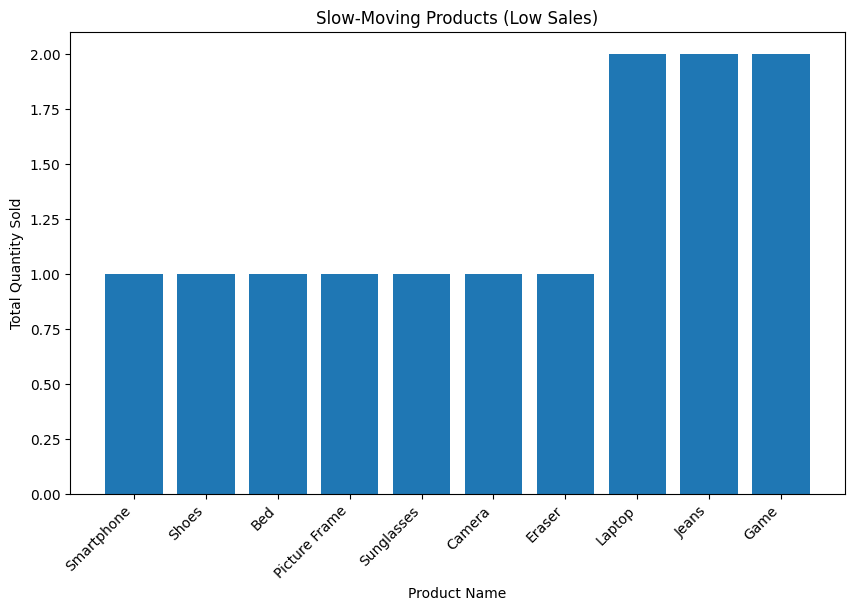

In [26]:
cursor.execute("SELECT product_id, SUM(quantity) AS total_quantity FROM order_details GROUP BY product_id ORDER BY total_quantity ASC LIMIT 10")
product_selling = pd.DataFrame(cursor.fetchall(), columns=['product_id', 'total_quantity'])

product_quantity = pd.read_sql_query("SELECT product_id, product_name FROM product", connection)
merged_data = product_selling.merge(product_quantity, on='product_id')
# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(merged_data['product_name'], merged_data['total_quantity'])
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')  # Match label with y-axis
plt.title('Slow-Moving Products (Low Sales)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

## Payment Analysis:
○
Display successful and pending payments order counts.

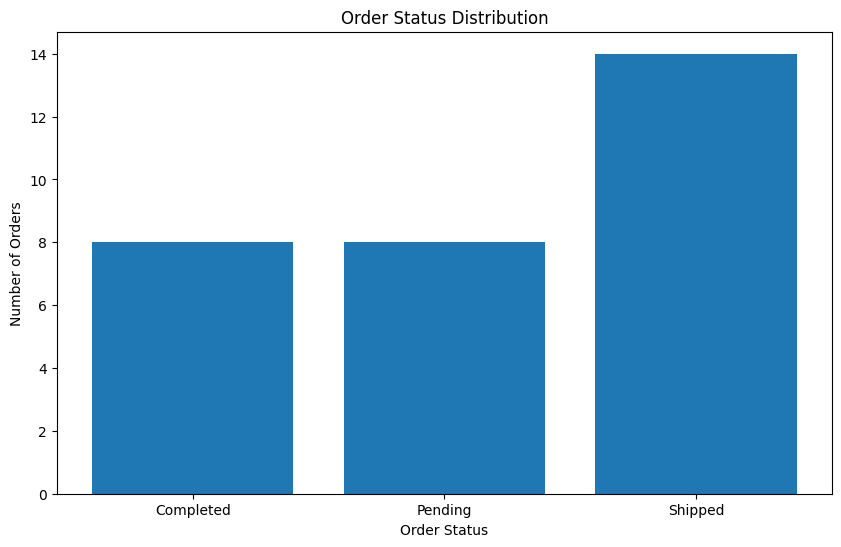

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'cursor' and 'connection' are set up for SQL queries

cursor.execute("SELECT order_status, COUNT(*) AS order_count FROM order_details GROUP BY order_status")
order_status_data = pd.DataFrame(cursor.fetchall(), columns=['order_status', 'order_count'])

plt.figure(figsize=(10, 6))
plt.bar(order_status_data['order_status'], order_status_data['order_count'])
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.title('Order Status Distribution')
plt.show()